In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the adjusted dataset
df = pd.read_csv("premier_league_adjusted.csv")

#### The attendance for matches held on weekdays vs. weekends

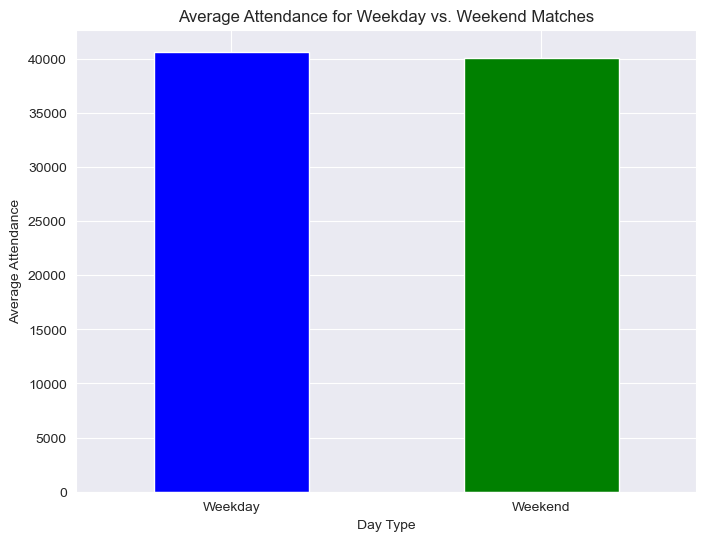

In [3]:
# Convert the 'Date' column to DateTime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week from the 'Date' column
df['Day_of_Week'] = df['Date'].dt.day_name()

# Create a function to classify days as weekday or weekend
def classify_weekday_or_weekend(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

# Apply the function to create a new column 'Day_Type'
df['Day_Type'] = df['Day_of_Week'].apply(classify_weekday_or_weekend)

# Calculate the average attendance for weekday and weekend matches
avg_attendance_by_day_type = df.groupby('Day_Type')['Attendance'].mean()

# Plot a bar chart to visualize the attendance variation
plt.figure(figsize=(8, 6))
avg_attendance_by_day_type.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Attendance for Weekday vs. Weekend Matches')
plt.xlabel('Day Type')
plt.ylabel('Average Attendance')
plt.xticks(rotation=0)
plt.show()

#### The correlation between a team's performance and attendance at their home matches

In [6]:
# Replace en dash with hyphen in the 'Score' column
df['Score'] = df['Score'].str.replace('–', '-')

# Calculate the total wins for each team at home
df['Home_Score'] = df['Score'].str.split('-').str[0].astype(int)
df['Away_Score'] = df['Score'].str.split('-').str[1].astype(int)
home_wins = df[df['Home_Score'] > df['Away_Score']].groupby('Home_Team')['Home_Team'].count()

# Calculate the average attendance for each team at home matches
avg_home_attendance = df.groupby('Home_Team')['Attendance'].mean()

# Create a DataFrame to hold the data for analysis
team_performance_attendance = pd.DataFrame({'Home_Wins': home_wins, 'Avg_Home_Attendance': avg_home_attendance})

# Calculate the Pearson correlation coefficient
correlation = team_performance_attendance['Home_Wins'].corr(team_performance_attendance['Avg_Home_Attendance'])

print(f"The Pearson correlation coefficient between Home Wins and Avg Home Attendance is {correlation:.2f}")

The Pearson correlation coefficient between Home Wins and Avg Home Attendance is 0.62


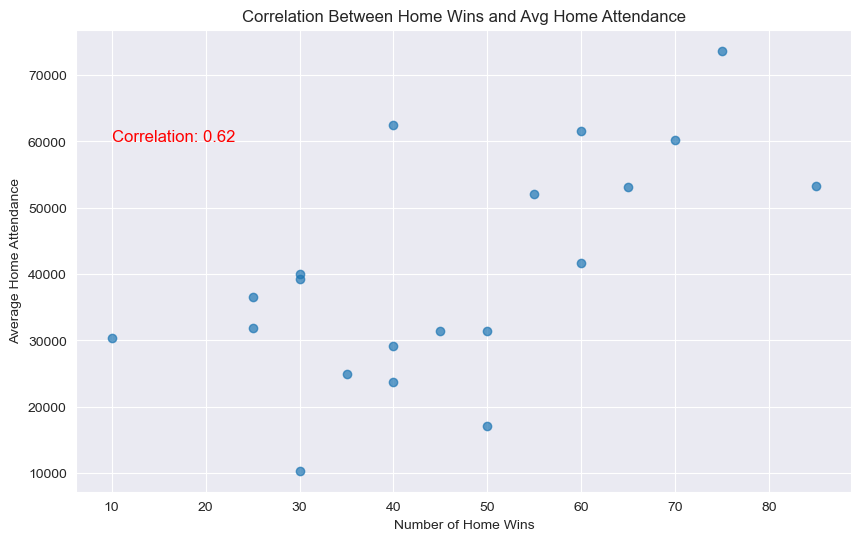

In [7]:
# Replace en dash with hyphen in the 'Score' column
df['Score'] = df['Score'].str.replace('–', '-')

# Calculate the total wins for each team at home
df['Home_Score'] = df['Score'].str.split('-').str[0].astype(int)
df['Away_Score'] = df['Score'].str.split('-').str[1].astype(int)
home_wins = df[df['Home_Score'] > df['Away_Score']].groupby('Home_Team')['Home_Team'].count()

# Calculate the average attendance for each team at home matches
avg_home_attendance = df.groupby('Home_Team')['Attendance'].mean()

# Create a DataFrame to hold the data for analysis
team_performance_attendance = pd.DataFrame({'Home_Wins': home_wins, 'Avg_Home_Attendance': avg_home_attendance})

# Calculate the Pearson correlation coefficient
correlation = team_performance_attendance['Home_Wins'].corr(team_performance_attendance['Avg_Home_Attendance'])

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(team_performance_attendance['Home_Wins'], team_performance_attendance['Avg_Home_Attendance'], alpha=0.7)
plt.title('Correlation Between Home Wins and Avg Home Attendance')
plt.xlabel('Number of Home Wins')
plt.ylabel('Average Home Attendance')
plt.grid(True)

# Add correlation coefficient as text to the plot
plt.text(10, 60000, f'Correlation: {correlation:.2f}', fontsize=12, color='red')

plt.show()

#### The stadiums that consistently have high attendance

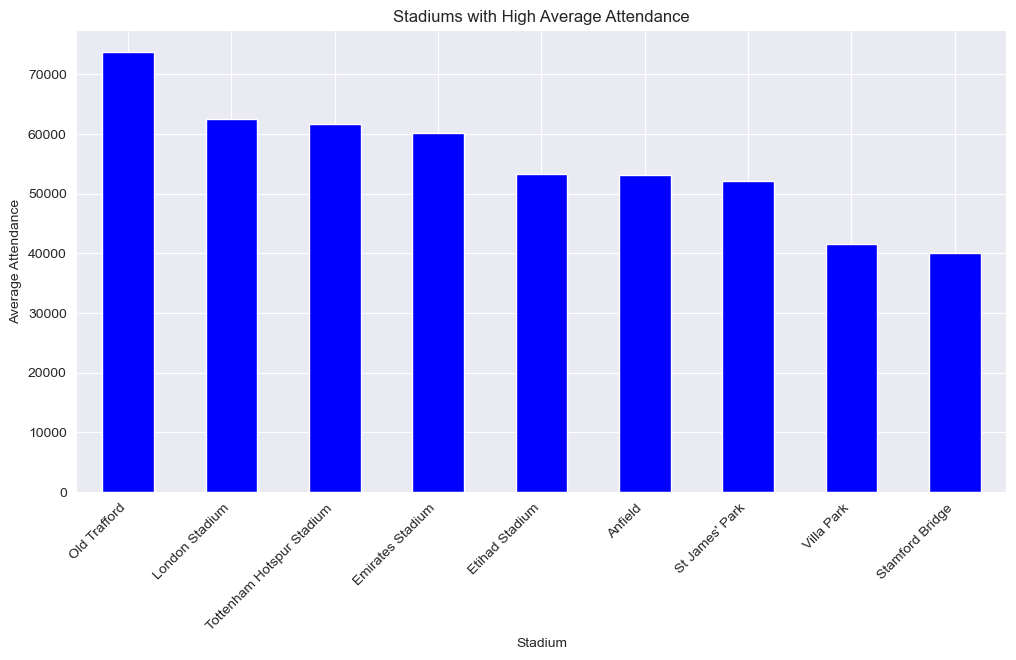

In [8]:
# Calculate the average attendance for each stadium
avg_attendance_by_stadium = df.groupby('Venue')['Attendance'].mean().sort_values(ascending=False)

# Define a threshold for what is considered "high attendance"
threshold = 40000  # You can adjust this threshold as needed

# Find stadiums with average attendance exceeding the threshold
high_attendance_stadiums = avg_attendance_by_stadium[avg_attendance_by_stadium > threshold]

# Plot a bar chart to visualize high-attendance stadiums
plt.figure(figsize=(12, 6))
high_attendance_stadiums.plot(kind='bar', color='blue')
plt.title('Stadiums with High Average Attendance')
plt.xlabel('Stadium')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45, ha="right")
plt.show()